# Analysis of the FEMM Simulation v2
* Unit Lineintegral = Weber  = magnetic Flux

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import matplotlib
# matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import pandas as pd
import math as m
import numpy as np

## Field excitation curve

In [3]:
file1="./rotor_parallel/Magnetkante_Mitte.txt"
df1=pd.read_csv(file1,skipinitialspace=False,delim_whitespace=True)
file2="./rotor_parallel/Mitte_Mitte.txt"
df2=pd.read_csv(file2,skipinitialspace=False,delim_whitespace=True)

In [4]:
gf1=df1['Length'].max()/(5*360/12)
df1['grad']=df1['Length']/gf1+90
df2['grad']=df2['Length']/gf1+90

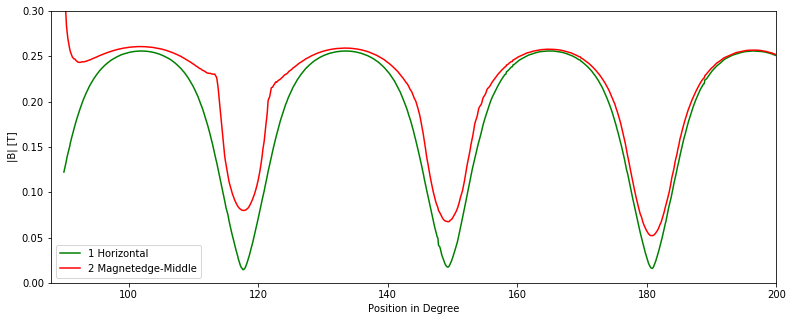

In [5]:
fig, ax1 =plt.subplots(figsize=(13,5))
ax1.plot(df1['grad'],df2['|B|Tesla'],label='1 Horizontal',lw=1.5,alpha=1,c='g')
ax1.plot(df1['grad'],df1['|B|Tesla'],label='2 Magnetedge-Middle',lw=1.5,alpha=1,c='r')
plt.xlim(88,200)
ax1.set_ylim(0.0,0.3)
ax1.legend(loc="lower left")
ax1.set_ylabel('|B| [T]')
ax1.set_xlabel('Position in Degree')
plt.savefig("B_Airgap_FEK.svg", bbox_inches='tight',dpi=900)
plt.show()

## Flux Linkage

In [6]:
#reads out Circuit’s flux linkage
file0='./rotor_parallel/2F12P_V2_0Deg_linkage.txt'
df0=pd.read_csv(file0,sep=";",skipinitialspace=True)
file0K007='./rotor_deviated/2F12P_V2_0K007Deg_linkage.txt'
df007=pd.read_csv(file0K007,sep=";",skipinitialspace=True)

In [7]:
frames=[df0,df007]
labels=['0°','0,007°']
labels=['parallel','deviated']

In [8]:
df0.head(2)

,i,I,V,Phi
0,90,0,0,0.003997
1,91,0,0,0.005057


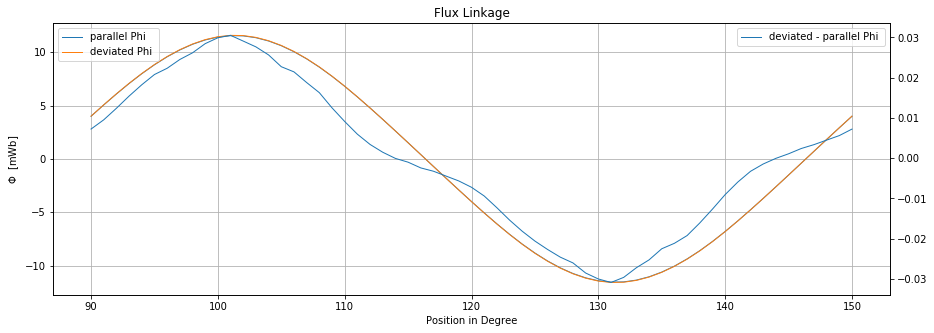

In [9]:
fig, ax1 =plt.subplots(figsize=(15,5))
for [df,label] in zip(frames,labels):
    ax1.plot(df['i'],df['Phi']*1e3,label=(label+' Phi '),lw=1)
#plt.xlim(90,270)
#plt.ylim(-2.3e-6,-1.2e-6)
ax2=ax1.twinx()
ax2.plot(df['i'],(frames[1]['Phi']-frames[0]['Phi'])*1e3,label=(labels[1]+' - '+labels[0]+' Phi '),lw=1)
ax1.grid()
ax1.legend( loc="upper left")
ax2.legend(loc="upper right")
ax1.set_ylabel(r'$ \Phi$  [mWb]')
ax1.set_xlabel('Position in Degree')
plt.title("Flux Linkage")
plt.savefig("FluxLinkeage.svg", bbox_inches='tight',dpi=900)
plt.show()

## Voltage

In [10]:
for df in frames:
    df['phi_diff']=df['Phi'].diff()

In [11]:
U_sp=24*2**1/2
k=U_sp/df0['phi_diff'].max() #Faktor


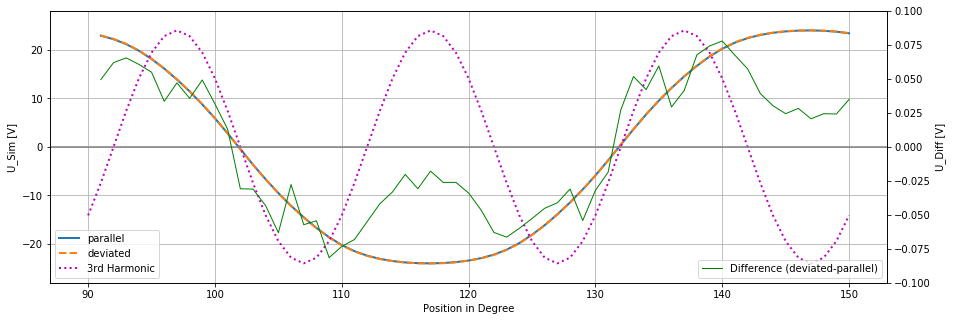

In [12]:
fig, ax1 =plt.subplots(figsize=(15,5))
ax2=ax1.twinx()
for [df,label] in zip(frames,labels):
    if(label==labels[1]):
            ls='--'
    else:
            ls='-'
    ax1.plot(df['i'],df['phi_diff']*k,label=label,lw=2,ls=ls)
ax1.plot(df['i'],-24*np.sin(3*(df['i']-42)*m.pi/180*180/30),label='3rd Harmonic',lw=2,ls='dotted',c='m')
ax2.plot(df['i'],(df007['phi_diff']*k)-(df0['phi_diff']*k),label='Difference ('+labels[1]+'-'+labels[0]+')',lw=1,c='g')
#plt.xlim(90,130)
ax1.set_ylim(-28,+28)
ax2.set_ylim(-0.1,+0.1)
ax1.axhline(0,c='grey')
#ax2.grid()
#ax1.legend(bbox_to_anchor=(1,1), loc="upper left")
ax1.legend(loc="lower left")
ax2.legend(loc="lower right")
ax1.set_ylabel('U_Sim [V]')
ax2.set_ylabel('U_Diff [V]')
ax1.set_xlabel('Position in Degree')
#plt.title("Spannung ein Längenelement der Statorspule")
ax1.grid(True)
plt.savefig("U_Sim_U_Diff.svg", bbox_inches='tight',dpi=900)
plt.show()

# Comparison Voltage RMS

In [13]:
u=df0['phi_diff']*k
rms0 = np.sqrt(np.mean(u**2))
u=df007['phi_diff']*k
rms007 = np.sqrt(np.mean(u**2))
print(rms0,rms007)
print(rms0-rms007)

18.145881125869224 18.18735264036013
-0.041471514490908135


## Complex numbers 
* a way to sum up the coil voltage to the terminals voltage

In [14]:
import cmath as cm
a=1*cm.exp(1j*0)+1*cm.exp(1j*2*m.pi/3)
print(a)

(0.5000000000000002+0.8660254037844387j)


In [15]:
(a.real**2+a.imag**2)**1/2

0.5000000000000002

In [16]:
#real
r=(1+m.cos(120*m.pi/180))
print(r)
#imag
im=0+m.sin(120*m.pi/180)
print(r,im,r**2,im**2,(r**2+im**2)**1/2,m.atan(im/r)*180/m.pi)

0.5000000000000002
0.5000000000000002 0.8660254037844387 0.2500000000000002 0.7500000000000001 0.5000000000000002 59.99999999999999
